In [1]:
from pathlib import Path
import sys
import numpy as np
import pandas as pd

# Ensure the project root is on sys.path so `from src...` imports work
PROJECT_ROOT = Path.cwd().parent  # notebook is in ./notebooks
if str(PROJECT_ROOT) not in sys.path:
    sys.path.insert(0, str(PROJECT_ROOT))

from src.dataloader.DataLoader import DataLoader
from sklearn.ensemble import RandomForestClassifier
from src.model.ScikitModel import ScikitModel
from src.learner.Trainer import Trainer
from src.learner.Tester import Tester
from src.learner.Learner import UpdatingLearner
from src.transformer.DataSelector import DataSelector
from src.transformer.Scope import ScopeExpander, ScopeShifter
from src.datawrapper.DataWrapper import DataWrapper
from src.transformer.TechIndicGenerator import TechIndicGenerator

csv_path = PROJECT_ROOT / 'btc_usdt_1h.csv'
wrapper = DataLoader.load_wrap(str(csv_path), data_type='tick')

type(wrapper)

src.datawrapper.TickWrapper.TickWrapper

In [2]:
tech_indic_generator = TechIndicGenerator()

In [3]:
wrapper.get_dataframe().head()

,open_time_iso,open,high,low,close,volume
0,2024-12-15 00:00:00+00:00,101420.00,101558.83,101237.14,101442.42,313.78863
1,2024-12-15 01:00:00+00:00,101442.41,102196.97,101424.01,102134.48,1458.80477
2,2024-12-15 02:00:00+00:00,102134.48,102155.28,101775.88,101831.15,728.33298
3,2024-12-15 03:00:00+00:00,101831.16,101931.73,101722.31,101733.82,216.32352
4,2024-12-15 04:00:00+00:00,101733.83,102850.00,101733.82,102366.17,1788.48948


In [4]:
wrapper.compute_log_return()

In [5]:
wrapper.get_dataframe().head(10)

,open_time_iso,open,high,low,close,volume,log_return
0,2024-12-15 00:00:00+00:00,101420.00,101558.83,101237.14,101442.42,313.78863,0.006799
1,2024-12-15 01:00:00+00:00,101442.41,102196.97,101424.01,102134.48,1458.80477,-0.002974
2,2024-12-15 02:00:00+00:00,102134.48,102155.28,101775.88,101831.15,728.33298,-0.000956
3,2024-12-15 03:00:00+00:00,101831.16,101931.73,101722.31,101733.82,216.32352,0.006196
4,2024-12-15 04:00:00+00:00,101733.83,102850.00,101733.82,102366.17,1788.48948,-0.002023
5,2024-12-15 05:00:00+00:00,102366.17,102511.81,102107.92,102159.29,485.39491,-0.003918
6,2024-12-15 06:00:00+00:00,102159.29,102169.90,101759.80,101759.80,417.41142,-0.000272
7,2024-12-15 07:00:00+00:00,101759.81,101941.18,101534.01,101732.09,399.71077,0.002779
8,2024-12-15 08:00:00+00:00,101732.09,102015.16,101581.07,102015.15,434.85636,0.002440
9,2024-12-15 09:00:00+00:00,102015.15,102270.95,101919.60,102264.34,361.99787,0.000153


In [6]:
tech_indic_generator.compute_ATR(wrapper)
tech_indic_generator.compute_RSI(wrapper)
tech_indic_generator.compute_BBANDS(wrapper)
tech_indic_generator.compute_EMA(wrapper)
tech_indic_generator.compute_HLC3(wrapper)
tech_indic_generator.compute_KAMA(wrapper)
tech_indic_generator.compute_SWMA(wrapper)
wrapper.get_dataframe().head()


,open_time_iso,open,high,low,close,volume,log_return,atr,rsi,bb_upper,bb_middle,bb_lower,ema,hlc3,kama,swma
0,2024-12-18 19:00:00+00:00,104805.44,104805.44,102817.82,102817.82,4875.44811,-0.019357,926.271549,34.516779,105867.300115,104441.9345,103016.568885,104311.613996,103480.360000,104341.164948,104324.630000
1,2024-12-18 20:00:00+00:00,102817.82,102997.77,100303.72,100846.67,10402.44410,0.001624,1052.541438,26.448023,106126.592240,104179.3215,102232.050760,103778.545689,101382.720000,103934.911116,103459.411667
2,2024-12-18 21:00:00+00:00,100846.68,101745.45,100481.81,101010.55,3022.31056,0.001404,1067.619907,27.955899,106275.596025,103963.2070,101650.817975,103352.700198,101079.270000,103687.022030,102191.420000
3,2024-12-18 22:00:00+00:00,101010.54,101560.89,100648.99,101152.45,1684.68673,-0.009421,1056.497056,29.307309,106282.985431,103755.1840,101227.382569,103014.200168,101120.776667,103430.773206,101280.785000
4,2024-12-18 23:00:00+00:00,101152.45,101203.45,100000.00,100204.01,2820.13370,0.006239,1066.993695,25.820944,106442.743816,103527.1855,100611.627184,102581.863219,100469.153333,102998.799932,100896.113333


In [7]:
wrapper.get_features()

,atr,swma,ema,rsi,close,open,kama,volume,high,low,bb_upper,bb_middle,bb_lower,hlc3
0,926.271549,104324.630000,104311.613996,34.516779,102817.82,104805.44,104341.164948,4875.44811,104805.44,102817.82,105867.300115,104441.9345,103016.568885,103480.360000
1,1052.541438,103459.411667,103778.545689,26.448023,100846.67,102817.82,103934.911116,10402.44410,102997.77,100303.72,106126.592240,104179.3215,102232.050760,101382.720000
2,1067.619907,102191.420000,103352.700198,27.955899,101010.55,100846.68,103687.022030,3022.31056,101745.45,100481.81,106275.596025,103963.2070,101650.817975,101079.270000
3,1056.497056,101280.785000,103014.200168,29.307309,101152.45,101010.54,103430.773206,1684.68673,101560.89,100648.99,106282.985431,103755.1840,101227.382569,101120.776667
4,1066.993695,100896.113333,102581.863219,25.820944,100204.01,101152.45,102998.799932,2820.13370,101203.45,100000.00,106442.743816,103527.1855,100611.627184,100469.153333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8708,766.726138,87112.071667,86904.642298,59.765677,87977.43,87298.00,86851.511598,1924.39377,88175.98,86839.35,87616.322320,86424.9415,85233.560680,87664.253333
8709,763.180700,87430.353333,87009.814252,55.290797,87588.26,87977.44,86876.130571,1300.81662,88050.17,87333.08,87770.479559,86515.0025,85259.525441,87657.170000
8710,762.254935,87593.560000,87028.610521,50.515289,87131.99,87588.26,86885.620155,779.27901,87844.01,87093.79,87836.031918,86559.4130,85282.794082,87356.596667
8711,776.283154,87533.213333,87144.416595,56.300174,87781.35,87132.00,86907.849183,863.99314,88019.88,87061.23,88009.270236,86635.5150,85261.759764,87620.820000


In [8]:
# wrapper.remove_features(['open', 'high', 'low', 'close', 'volume'])

In [9]:
wrapper.get_labels()

,log_return
0,-0.019357
1,0.001624
2,0.001404
3,-0.009421
4,0.006239
...,...
8708,-0.004433
8709,-0.005223
8710,0.007425
8711,-0.002231


In [10]:
wrapper.get_dataframe().head(10)

,open_time_iso,open,high,low,close,volume,log_return,atr,rsi,bb_upper,bb_middle,bb_lower,ema,hlc3,kama,swma
0,2024-12-18 19:00:00+00:00,104805.44,104805.44,102817.82,102817.82,4875.44811,-0.019357,926.271549,34.516779,105867.300115,104441.9345,103016.568885,104311.613996,103480.360000,104341.164948,104324.630000
1,2024-12-18 20:00:00+00:00,102817.82,102997.77,100303.72,100846.67,10402.44410,0.001624,1052.541438,26.448023,106126.592240,104179.3215,102232.050760,103778.545689,101382.720000,103934.911116,103459.411667
2,2024-12-18 21:00:00+00:00,100846.68,101745.45,100481.81,101010.55,3022.31056,0.001404,1067.619907,27.955899,106275.596025,103963.2070,101650.817975,103352.700198,101079.270000,103687.022030,102191.420000
3,2024-12-18 22:00:00+00:00,101010.54,101560.89,100648.99,101152.45,1684.68673,-0.009421,1056.497056,29.307309,106282.985431,103755.1840,101227.382569,103014.200168,101120.776667,103430.773206,101280.785000
4,2024-12-18 23:00:00+00:00,101152.45,101203.45,100000.00,100204.01,2820.13370,0.006239,1066.993695,25.820944,106442.743816,103527.1855,100611.627184,102581.863219,100469.153333,102998.799932,100896.113333
5,2024-12-19 00:00:00+00:00,100204.01,100986.09,100128.00,100831.16,2011.20722,-0.010590,1052.072003,31.614032,106512.018652,103375.3430,100238.667348,102312.524262,100648.416667,102795.791736,100759.105000
6,2024-12-19 01:00:00+00:00,100831.17,100903.28,99605.98,99768.97,1922.58004,0.007644,1069.588288,27.672281,106690.540030,103185.1830,99679.825970,101921.208222,100092.743333,102467.463665,100498.626667
7,2024-12-19 02:00:00+00:00,99768.97,100534.56,98802.00,100534.56,4808.23260,0.006530,1116.943411,34.054520,106698.061591,103022.1785,99346.295409,101707.877726,99957.040000,102291.904202,100323.138333
8,2024-12-19 03:00:00+00:00,100534.56,101310.25,100456.00,101193.15,2269.12938,-0.005167,1098.179595,39.037983,106582.224406,102869.2985,99156.372594,101628.688845,100986.466667,102217.772282,100438.561667
9,2024-12-19 04:00:00+00:00,101193.15,101228.31,100629.99,100671.62,834.97520,0.006223,1062.475339,36.674466,106517.644248,102712.6080,98907.571752,101481.447484,100843.306667,102111.791498,100649.335000


In [11]:
# 1. Define Training Scope
train_scope = ScopeShifter(
    wrapper=wrapper, 
    parameters={'window_size': "10d", 'step_size': "48h"}
)

# 2. Configure Testing Window Size here
# Example: Set testing window to 2 Days (48 hours)
test_params = {'testing_window_size': "48h"}

selector = DataSelector(
    wrapper=wrapper, 
    training_scope=train_scope,
    test_parameters=test_params  # <--- PASSED HERE
)


print("Starting Walk-Forward Validation...")

# 2. Loop
iteration = 0
while not selector.is_last_window():
    iteration += 1
    
    # PRINT FROM SELECTOR (not from 'scope')
    info = selector.current_state_info() 
    print(f"Iter {iteration}: Train Indices={info['train_indices']} | Test Indices={info['test_indices']}")
    
    # 3. Update
    selector.update()
    
    # Safety break for testing
    if iteration > 30: 
        break

[WindowScope] Initialized with start: 2024-12-18 19:00:00, end: 2025-12-16 19:00:00, step_size: 2 days 00:00:00, window_size: 10 days 00:00:00
[WindowScope] Initialized with start: 2024-12-18 19:00:00, end: 2025-12-16 19:00:00, step_size: 1 days 00:00:00, window_size: 30 days 00:00:00
Starting Walk-Forward Validation...
Iter 1: Train Indices=(Timestamp('2024-12-18 19:00:00'), Timestamp('2024-12-28 19:00:00')) | Test Indices=(Timestamp('2024-12-28 19:00:00'), Timestamp('2024-12-30 19:00:00'))
Iter 2: Train Indices=(Timestamp('2024-12-20 19:00:00'), Timestamp('2024-12-30 19:00:00')) | Test Indices=(Timestamp('2024-12-30 19:00:00'), Timestamp('2025-01-01 19:00:00'))
Iter 3: Train Indices=(Timestamp('2024-12-22 19:00:00'), Timestamp('2025-01-01 19:00:00')) | Test Indices=(Timestamp('2025-01-01 19:00:00'), Timestamp('2025-01-03 19:00:00'))
Iter 4: Train Indices=(Timestamp('2024-12-24 19:00:00'), Timestamp('2025-01-03 19:00:00')) | Test Indices=(Timestamp('2025-01-03 19:00:00'), Timestamp('2

In [12]:
from sklearn.linear_model import LinearRegression

# Use the Regressor instead of the Classifier
lr_estimator = LinearRegression()
my_model = ScikitModel(lr_estimator)

# 2. Pass the object (The new class simply stores it)
my_model = ScikitModel(lr_estimator)
# 3. Train
trainer = Trainer(model=my_model)

In [13]:
tester = Tester(model=my_model)

In [14]:
from src.learner.Learner import Learner
import pandas as pd

class DebugUpdatingLearner(Learner):
    """
    A Debugging version of UpdatingLearner that prints loop details.
    """
    def __init__(self, trainer, tester, data_wrapper, data_selector, **kwargs):
        super().__init__(trainer, tester, data_wrapper, data_selector, is_last=True, **kwargs)

    def run(self) -> pd.DataFrame:
        all_predictions = []
        self.data_selector.reset()
        
        iteration = 0
        while True:
            iteration += 1
            print(f"\n--- Iteration {iteration} ---")
            
            # 1. Get Scopes info
            train_info = self.data_selector.training_scope.current_state()
            test_info = self.data_selector.testing_scope.current_state()
            print(f"Train Scope: {train_info}")
            print(f"Test Scope:  {test_info}")

            # 2. Slice Data
            train_data = self.data_selector.get_train_data()
            test_data = self.data_selector.get_test_data()
            
            n_train = len(train_data.get_dataframe())
            n_test = len(test_data.get_dataframe())
            print(f"Rows Found -> Train: {n_train}, Test: {n_test}")

            # 3. Stop Logic Analysis
            if n_train == 0 and n_test == 0:
                print("STOPPING: Both Train and Test data are empty (End of Dataset).")
                break
            
            # GAP HANDLING: If we have train data but no test data, it might just be a gap.
            # We should CONTINUE shifting, not break.
            if n_test == 0:
                print("WARNING: Test data is empty (Gap in data or End of Scope). Skipping prediction...")
                
                # Check if we are past the end of the global dataset
                # (Assuming Scope knows the end_value)
                if not self.data_selector.testing_scope.is_in_scope():
                     print("STOPPING: Test Scope is out of bounds (End of Time).")
                     break
                else:
                     print("CONTINUING: Shifting to next window to find data.")
                     self.data_selector.update()
                     continue

            # 4. Train & Predict
            print("Action: Training and Testing...")
            self.train(train_data)
            fold_predictions = self.test(test_data)
            
            if not fold_predictions.empty:
                all_predictions.append(fold_predictions)
                print(f"New all_predicitons size:{len(all_predictions)}" )
            
            # 5. Update
            print("Action: Shifting Window...")
            self.data_selector.update()

        if not all_predictions:
            print("Result: No predictions generated.")
            return pd.DataFrame()
            
        return pd.concat(all_predictions)

In [15]:
# 5. Create the Learner
learner = DebugUpdatingLearner(
    trainer=trainer,
    tester=tester,
    data_wrapper=wrapper, # Optional, as selector has it
    data_selector=selector
)


In [16]:
# 6. Run the Walk-Forward Validation
results = learner.compute()
# results = pd.read_csv(PROJECT_ROOT / 'walk_forward_results.csv')


--- Iteration 1 ---
Train Scope: (Timestamp('2024-12-18 19:00:00'), Timestamp('2024-12-28 19:00:00'))
Test Scope:  (Timestamp('2024-12-28 19:00:00'), Timestamp('2024-12-30 19:00:00'))
Rows Found -> Train: 240, Test: 48
Action: Training and Testing...
New all_predicitons size:1
Action: Shifting Window...

--- Iteration 2 ---
Train Scope: (Timestamp('2024-12-20 19:00:00'), Timestamp('2024-12-30 19:00:00'))
Test Scope:  (Timestamp('2024-12-30 19:00:00'), Timestamp('2025-01-01 19:00:00'))


Rows Found -> Train: 240, Test: 48
Action: Training and Testing...
New all_predicitons size:2
Action: Shifting Window...

--- Iteration 3 ---
Train Scope: (Timestamp('2024-12-22 19:00:00'), Timestamp('2025-01-01 19:00:00'))
Test Scope:  (Timestamp('2025-01-01 19:00:00'), Timestamp('2025-01-03 19:00:00'))
Rows Found -> Train: 240, Test: 48
Action: Training and Testing...
New all_predicitons size:3
Action: Shifting Window...

--- Iteration 4 ---
Train Scope: (Timestamp('2024-12-24 19:00:00'), Timestamp('2025-01-03 19:00:00'))
Test Scope:  (Timestamp('2025-01-03 19:00:00'), Timestamp('2025-01-05 19:00:00'))
Rows Found -> Train: 240, Test: 48
Action: Training and Testing...
New all_predicitons size:4
Action: Shifting Window...

--- Iteration 5 ---
Train Scope: (Timestamp('2024-12-26 19:00:00'), Timestamp('2025-01-05 19:00:00'))
Test Scope:  (Timestamp('2025-01-05 19:00:00'), Timestamp('2025-01-07 19:00:00'))
Rows Found -> Train: 240, Test: 48
Action: Training and Testing...
New all_predici

In [17]:
results.get_dataframe().isnull().sum()

open_time_iso      0
open               0
high               0
low                0
close              0
volume             0
log_return         0
atr                0
rsi                0
bb_upper           0
bb_middle          0
bb_lower           0
ema                0
hlc3               0
kama               0
swma               0
prediction       240
dtype: int64

In [18]:
results.get_dataframe().head(50)
# save results to csv
# results.to_csv(PROJECT_ROOT / 'walk_forward_results.csv', index=False)

,open_time_iso,open,high,low,close,volume,log_return,atr,rsi,bb_upper,bb_middle,bb_lower,ema,hlc3,kama,swma,prediction
0,2024-12-18 19:00:00+00:00,104805.44,104805.44,102817.82,102817.82,4875.44811,-0.019357,926.271549,34.516779,105867.300115,104441.9345,103016.568885,104311.613996,103480.360000,104341.164948,104324.630000,NaN
1,2024-12-18 20:00:00+00:00,102817.82,102997.77,100303.72,100846.67,10402.44410,0.001624,1052.541438,26.448023,106126.592240,104179.3215,102232.050760,103778.545689,101382.720000,103934.911116,103459.411667,NaN
2,2024-12-18 21:00:00+00:00,100846.68,101745.45,100481.81,101010.55,3022.31056,0.001404,1067.619907,27.955899,106275.596025,103963.2070,101650.817975,103352.700198,101079.270000,103687.022030,102191.420000,NaN
3,2024-12-18 22:00:00+00:00,101010.54,101560.89,100648.99,101152.45,1684.68673,-0.009421,1056.497056,29.307309,106282.985431,103755.1840,101227.382569,103014.200168,101120.776667,103430.773206,101280.785000,NaN
4,2024-12-18 23:00:00+00:00,101152.45,101203.45,100000.00,100204.01,2820.13370,0.006239,1066.993695,25.820944,106442.743816,103527.1855,100611.627184,102581.863219,100469.153333,102998.799932,100896.113333,NaN
5,2024-12-19 00:00:00+00:00,100204.01,100986.09,100128.00,100831.16,2011.20722,-0.010590,1052.072003,31.614032,106512.018652,103375.3430,100238.667348,102312.524262,100648.416667,102795.791736,100759.105000,NaN
6,2024-12-19 01:00:00+00:00,100831.17,100903.28,99605.98,99768.97,1922.58004,0.007644,1069.588288,27.672281,106690.540030,103185.1830,99679.825970,101921.208222,100092.743333,102467.463665,100498.626667,NaN
7,2024-12-19 02:00:00+00:00,99768.97,100534.56,98802.00,100534.56,4808.23260,0.006530,1116.943411,34.054520,106698.061591,103022.1785,99346.295409,101707.877726,99957.040000,102291.904202,100323.138333,NaN
8,2024-12-19 03:00:00+00:00,100534.56,101310.25,100456.00,101193.15,2269.12938,-0.005167,1098.179595,39.037983,106582.224406,102869.2985,99156.372594,101628.688845,100986.466667,102217.772282,100438.561667,NaN
9,2024-12-19 04:00:00+00:00,101193.15,101228.31,100629.99,100671.62,834.97520,0.006223,1062.475339,36.674466,106517.644248,102712.6080,98907.571752,101481.447484,100843.306667,102111.791498,100649.335000,NaN


In [19]:
results.shape

AttributeError: 'TickWrapper' object has no attribute 'shape'

In [ ]:
results.index[:100]

RangeIndex(start=0, stop=100, step=1)

In [ ]:
results.head()

,open_time_iso,log_return,prediction
0,2024-12-28 19:00:00+00:00,0.000582,-0.000240
1,2024-12-28 20:00:00+00:00,0.000932,0.000037
2,2024-12-28 21:00:00+00:00,0.001624,0.000158
3,2024-12-28 22:00:00+00:00,-0.000277,0.000393
4,2024-12-28 23:00:00+00:00,-0.001591,0.000321


In [ ]:
results.describe()

,log_return,prediction
count,8473.000000,8473.000000
mean,-0.000009,0.000006
std,0.004774,0.002166
min,-0.050195,-0.013461
25%,-0.001964,-0.000909
50%,0.000022,-0.000037
75%,0.002075,0.000863
max,0.049047,0.018024


In [ ]:
# results.get_dataframe().isnull().sum()

In [ ]:
# results.get_dataframe().head()

In [ ]:
# import matplotlib.pyplot as plt

# def backtest_strategy(df, log_col='log_return', pred_log_col='prediction'):
#     """
#     Backtests a simple Long/Short strategy based on the sign of predictions.
#     """
#     # 1. Define Position: 1 for Buy, -1 for Sell
#     # np.sign returns 1.0, -1.0, or 0.
#     df['return'] = np.exp(df[log_col]) - 1  # Convert log returns to simple returns
#     df['predicted_return'] = np.exp(df[pred_log_col]) - 1  # Convert predicted log returns to simple returns
#     df['position'] = np.sign(df['predicted_return'])
    
#     # 2. Calculate Strategy Returns
#     # Note: We assume 'pred_col' is aligned with 'true_col' (prediction for today vs true return today)
#     df['strategy_return'] = df['position'] * df['return']
    
#     # 3. Calculate Cumulative Returns (Equity Curve)
#     # Since these are log returns, we can sum them up to get cumulative performance
#     df['cum_strategy_return'] = df['strategy_return'].cumsum()
#     df['cum_buy_hold_return'] = df['return'].cumsum()
    
#     return df

# def calculate_metrics(df, strategy_col='strategy_return'):
#     """
#     Computes Sharpe Ratio, Total Return, and Win Rate.
#     """
#     # Annualization factor (252 trading days)
#     annual_factor = 252
    
#     # # 1. Total Return 
#     total_return = df['strategy_return'].sum()
    
#     # 2. Annualized Mean & Volatility
#     mean_daily_return = df[strategy_col].mean()
#     daily_volatility = df[strategy_col].std()
    
#     # 3. Sharpe Ratio (Assuming 0% Risk-Free Rate for simplicity)
#     if daily_volatility == 0:
#         sharpe = 0
#     else:
#         sharpe = (mean_daily_return / daily_volatility) * np.sqrt(annual_factor)
    
#     # 4. Win Rate (How often was the sign correct?)
#     # A trade is a "Win" if Strategy Return > 0
#     wins = df[df[strategy_col] > 0]
#     win_rate = len(wins) / len(df) * 100
    
#     print(f"--- Strategy Performance ---")
#     print(f"Total Cumulative Return: {total_return * 100:.2f}%")
#     print(f"Annualized Sharpe Ratio: {sharpe:.2f}")
#     print(f"Win Rate: {win_rate:.2f}%")
    
#     return sharpe

# # --- Usage Example ---
# # Assuming 'df' is your dataframe with columns 'true_log_return' and 'predicted_log_return'
# df = backtest_strategy(results)
# sharpe = calculate_metrics(df)


# plt.figure(figsize=(10, 5))
# plt.plot(df.index, df['cum_strategy_return'], label='Buy & Hold', color='gray', linestyle='--')
# plt.plot(df.index, df['cum_buy_hold_return'], label='My Strategy', color='green')
# plt.title(f'Strategy Equity Curve (Sharpe: {sharpe:.2f})')
# plt.xlabel('open_time')
# plt.ylabel('Wealth Index (Start = 1.0)')
# plt.legend()
# plt.grid(True, alpha=0.3)
# plt.show()


In [ ]:
results.head()

,open_time_iso,log_return,prediction
0,2024-12-28 19:00:00+00:00,0.000582,-0.000240
1,2024-12-28 20:00:00+00:00,0.000932,0.000037
2,2024-12-28 21:00:00+00:00,0.001624,0.000158
3,2024-12-28 22:00:00+00:00,-0.000277,0.000393
4,2024-12-28 23:00:00+00:00,-0.001591,0.000321


In [ ]:
results['return'] = np.exp(results['log_return']) - 1

In [ ]:
results.head()

,open_time_iso,log_return,prediction,return
0,2024-12-28 19:00:00+00:00,0.000582,-0.000240,0.000582
1,2024-12-28 20:00:00+00:00,0.000932,0.000037,0.000932
2,2024-12-28 21:00:00+00:00,0.001624,0.000158,0.001626
3,2024-12-28 22:00:00+00:00,-0.000277,0.000393,-0.000277
4,2024-12-28 23:00:00+00:00,-0.001591,0.000321,-0.001590


In [ ]:
total_return = (1 + results['return']).cumprod()

In [ ]:
# total_return = results['return'].sum()
total_return

0       1.000582
1       1.001514
2       1.003143
3       1.002865
4       1.001270
          ...   
8468    0.921712
8469    0.916911
8470    0.923744
8471    0.921686
8472    0.923619
Name: return, Length: 8473, dtype: float64

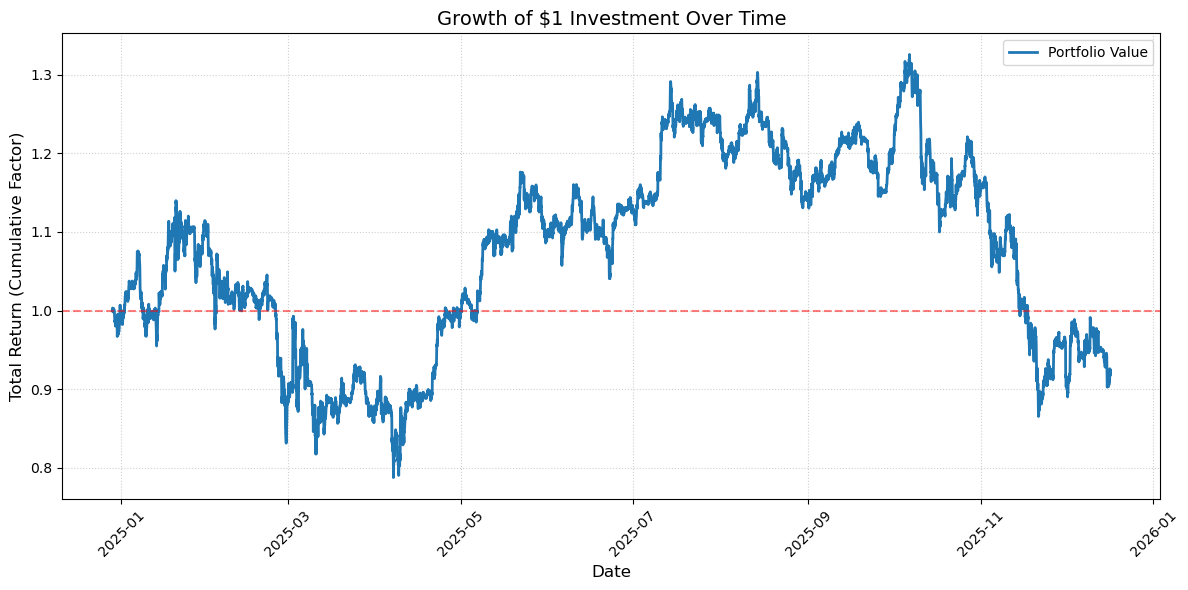

In [ ]:
import matplotlib.pyplot as plt

# 3. Visualization
plt.figure(figsize=(12, 6))
plt.plot(results['open_time_iso'], total_return, color='#1f77b4', linewidth=2, label='Portfolio Value')

# Adding a horizontal line at 1.0 to show the break-even point
plt.axhline(y=1.0, color='red', linestyle='--', alpha=0.5)

# Formatting the chart
plt.title('Growth of $1 Investment Over Time', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Return (Cumulative Factor)', fontsize=12)
plt.grid(True, linestyle=':', alpha=0.6)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

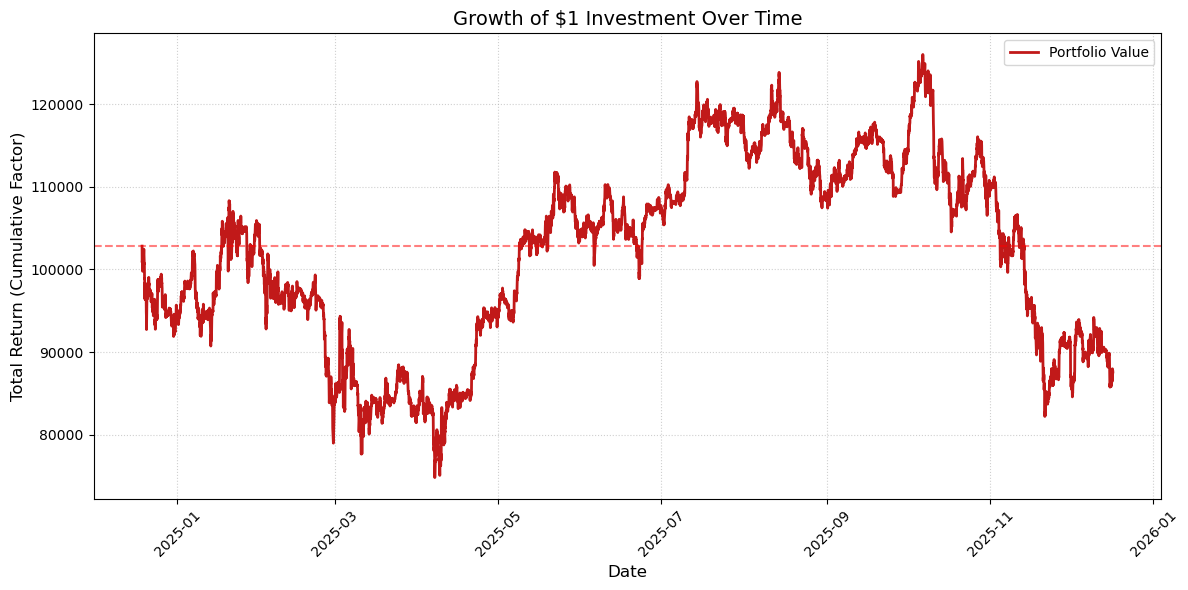

In [ ]:
# 3. Visualization
plt.figure(figsize=(12, 6))
plt.plot(wrapper.get_dataframe()['open_time_iso'], wrapper.get_dataframe()['close'], color="#c11919", linewidth=2, label='Portfolio Value')

# Adding a horizontal line at 1.0 to show the break-even point
plt.axhline(y=wrapper.get_dataframe()['close'].iloc[0], color='red', linestyle='--', alpha=0.5)

# Formatting the chart
plt.title('Growth of $1 Investment Over Time', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Return (Cumulative Factor)', fontsize=12)
plt.grid(True, linestyle=':', alpha=0.6)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()